In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time
import environment.trading_environment as env
from agent.dqn import DQN

## Training Evaluation

In [2]:
train_aapl_history = pd.read_csv("train_aapl_history.csv")
train_pg_history = pd.read_csv("train_pg_history.csv")

In [59]:
col_names = [
    "Period",
    "Reward E1",
    "Time E1",
    "Period E2",
    "Reward E2",
    "Time E2",
    "Period E3",
    "Reward E3",
    "Time E3",
]

df = pd.DataFrame(np.hstack(np.split(train_aapl_history, 3)), columns=col_names)
df.drop(df[["Period E2", "Period E3"]], axis=1, inplace=True)
df

,Period,Reward E1,Time E1,Reward E2,Time E2,Reward E3,Time E3
0,6440,-733.665237,0.0010235309600830078,50.11631,1560.2655401229858,59.764137,3507.4394977092743
1,6460,-1467.618332,0.004232645034790039,683.312302,1714.2011206150055,791.38916,3664.2837450504303
2,6480,-1711.104507,0.007359504699707031,1671.677513,1867.9513823986053,1815.345268,3821.086730480194
3,6500,-2066.848717,63.620696783065796,3614.61174,2022.123316526413,4387.568207,3980.8029940128326
4,6520,-5560.703735,222.1989140510559,-125.716934,2177.0178232192993,142.990189,4138.276814460754
5,6540,-5053.833427,381.1625506877899,3256.267319,2331.5620794296265,3541.445084,4296.02333855629
6,6560,-4820.616875,540.8446314334869,3460.181923,2486.6488933563232,4337.559128,4453.314564704895
7,6580,-5376.410141,700.1521980762482,4749.631462,2641.710932970047,5786.427002,4611.388503074646
8,6600,-6053.298912,859.9111132621765,9120.785522,2797.7799882888794,10673.485832,4771.177576303482
9,6620,-5177.950401,1015.0899639129639,15212.558327,2953.3498711586,17408.914642,4932.207562923431


In [60]:
df_pg = pd.DataFrame(np.hstack(np.split(train_pg_history, 3)), columns=col_names)
df_pg.drop(df_pg[["Period E2", "Period E3"]], axis=1, inplace=True)
df_pg

,Period,Reward E1,Time E1,Reward E2,Time E2,Reward E3,Time E3
0,6440.0,20.555115,0.000999,134.436035,1549.580938,175.162888,3527.891241
1,6460.0,-3360.005112,0.004016,2.708588,1709.113201,-684.027252,3683.207701
2,6480.0,-6907.150116,0.006016,127.283478,1869.394872,567.310562,3849.590295
3,6500.0,-10623.841019,64.608460,556.197052,2032.268734,1105.448532,4014.524374
4,6520.0,-10512.779922,222.980283,2204.376450,2193.743072,3034.069290,4181.826021
5,6540.0,-14078.035507,381.693930,4014.901657,2354.276023,7469.441223,4345.549727
6,6560.0,-15612.514114,540.140138,6406.675568,2513.985011,11299.290161,4509.167331
7,6580.0,-16755.307693,698.717263,10256.884766,2667.283945,15303.217926,4671.592722
8,6600.0,-17808.061829,857.555415,10783.530426,2821.072500,15850.516357,4834.782767
9,6620.0,-18988.347092,1011.508969,11060.732422,2976.055508,16138.589020,4998.951729


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0, 0, 'Jan 2019'),
 Text(2, 0, 'Mar 2019'),
 Text(4, 0, 'Mai 2019'),
 Text(6, 0, 'Jul 2019'),
 Text(8, 0, 'Sep 2019'),
 Text(10, 0, 'Nov 2019'),
 Text(12, 0, 'Jan 2020')]

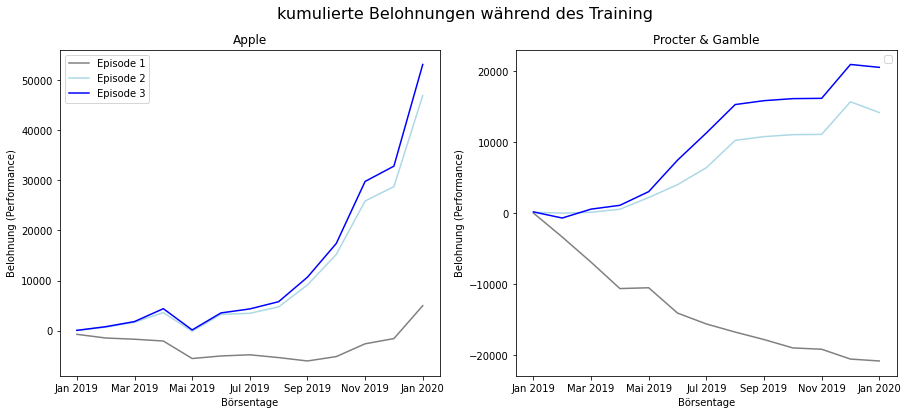

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharex=True)
fig.suptitle("kumulierte Belohnungen während des Training", fontsize=16)

x_labels = [
    "Jan 2019",
    "Mar 2019",
    "Mai 2019",
    "Jul 2019",
    "Sep 2019",
    "Nov 2019",
    "Jan 2020",
]

# Plot für die erste Aktie
lines = ax1.plot(df[["Reward E1", "Reward E2", "Reward E3"]], label=["Episode 1", "Episode 2", "Episode 3"])
lines[0].set_color("gray")
lines[1].set_color("lightblue")
lines[2].set_color("blue")
ax1.set_title("Apple")
ax1.set_xlabel("Börsentage")
ax1.set_ylabel("Belohnung (Performance)")
ax1.legend()
ax1.xaxis.set_ticks([x for x in range(0, 14, 2)])
ax1.set_xticklabels(x_labels)

# Plot für die zweite Aktie
lines = ax2.plot(df_pg[["Reward E1", "Reward E2", "Reward E3"]])
lines[0].set_color("gray")
lines[1].set_color("lightblue")
lines[2].set_color("blue")
ax2.set_title("Procter & Gamble")
ax2.set_xlabel("Börsentage")
ax2.set_ylabel("Belohnung (Performance)")
ax2.legend()
ax2.xaxis.set_ticks([x for x in range(0, 14, 2)])
ax2.set_xticklabels(x_labels)

## Apple Test Evaluation

In [5]:
loaded_stocks = pd.read_csv("data/historically_stocks.csv", index_col=0, header=[0, 1])

<AxesSubplot:xlabel='Date'>

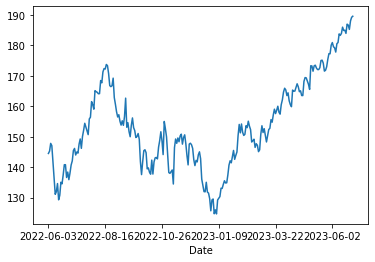

In [7]:
loaded_stocks.iloc[7285:7554]["Adj Close"]["AAPL"].plot()

In [2]:
portfolio = env.setup_environment()
print("Portfolio balance:", portfolio.balance)
print("Stocks in portfolio:", len(portfolio.stocks))

Portfolio balance: 100000
Stocks in portfolio: 0


In [5]:
agent = DQN(action_space=3, epsilon=0)
agent.model.load_weights("models/aapl/dqn_2")

actions = {
    0: "Hold",
    1: "Buy",
    2: "Sell"
}

value_history = []
buy_history = []
sell_history = []

def step(actions, period):
    action = np.argmax(actions)
    value_before = portfolio.get_value()

    global buy_history, sell_history

    if action == 0:
        # Hold
        pass
    if action == 1:
        # Buy
        try:
            portfolio.buy("AAPL", 10)
            buy_history += [period]
        except:
            pass

    if action == 2:
        # Sell
        try:
            portfolio.sell("AAPL", 10)
            sell_history += [period]
        except:
            pass

    portfolio.market.update_prices()

    state = portfolio.get_state()
    reward = portfolio.get_value() - value_before
    return state, reward

start_time = time.time()


# Reset environment
portfolio.reset()
portfolio.market.time_offset = 7285

total_reward = 0

for period in range(7285, 7554):
    if(period % 20 == 0):
        print(f"Periode: {period}, Total Reward: {total_reward}, {time.time()-start_time}")
    
    state = portfolio.get_state()
    value_history += [portfolio.get_value()]

    action = agent.act(state)
    next_state, reward = step(action, period)

    total_reward += reward


Periode: 7300, Total Reward: 438.38226318359375, 2.285856008529663
Periode: 7320, Total Reward: 3031.801300048828, 3.465210437774658
Periode: 7340, Total Reward: 8806.355895996094, 4.5845630168914795
Periode: 7360, Total Reward: 643.0049133300781, 5.698903560638428
Periode: 7380, Total Reward: -5736.7962646484375, 6.794525861740112
Periode: 7400, Total Reward: -2387.1975708007812, 7.904088020324707
Periode: 7420, Total Reward: -10352.494506835938, 8.98426628112793
Periode: 7440, Total Reward: -10715.441589355469, 10.069663763046265
Periode: 7460, Total Reward: 622.5833129882812, 11.140000581741333
Periode: 7480, Total Reward: 486.2773132324219, 12.22774052619934
Periode: 7500, Total Reward: 8645.485229492188, 13.333581924438477
Periode: 7520, Total Reward: 13961.637420654297, 14.417645931243896
Periode: 7540, Total Reward: 18804.13543701172, 15.514885425567627


In [6]:
print("Portfolio balance:", portfolio.balance)
print("Stocks in portfolio:", portfolio.stocks["AAPL"])

Portfolio balance: 1180.1310729980469
Stocks in portfolio: 650


In [9]:
print(buy_history)

[7285, 7286, 7287, 7288, 7289, 7290, 7291, 7292, 7293, 7294, 7295, 7296, 7297, 7298, 7299, 7300, 7301, 7302, 7303, 7304, 7305, 7306, 7307, 7308, 7309, 7310, 7311, 7312, 7313, 7314, 7315, 7316, 7317, 7318, 7319, 7320, 7321, 7322, 7323, 7324, 7325, 7326, 7327, 7328, 7329, 7330, 7331, 7332, 7333, 7334, 7335, 7336, 7337, 7338, 7339, 7340, 7341, 7342, 7343, 7344, 7345, 7346, 7347, 7348, 7349]


In [8]:
print(value_history)

[100000, 100007.55477905273, 100058.64974975586, 100036.28341674805, 99824.74655151367, 99550.88256835938, 99237.75207519531, 99298.98498535156, 99511.31652832031, 99030.8871459961, 99179.99755859375, 99651.2825012207, 99589.25369262695, 99966.6000366211, 100438.3822631836, 100438.3822631836, 99767.1908569336, 100069.6842956543, 99620.56869506836, 100037.97378540039, 100560.8528137207, 100844.75463867188, 101594.87823486328, 101752.63122558594, 101234.92248535156, 101480.95520019531, 101385.32775878906, 102185.15167236328, 102658.3267211914, 101764.66598510742, 102936.66458129883, 103565.30670166016, 104300.12115478516, 103886.7903137207, 103501.48361206055, 103031.80130004883, 104889.10598754883, 105095.07995605469, 107044.23248291016, 106656.55334472656, 106060.10559082031, 108554.42031860352, 108420.81192016602, 108322.3664855957, 108112.12844848633, 108134.52682495117, 110112.68264770508, 109761.78192138672, 111486.69403076172, 112018.35479736328, 111938.7191772461, 112710.38833618

<AxesSubplot:>

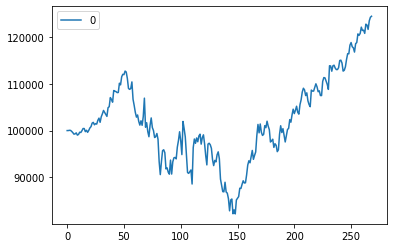

In [10]:
value_history = pd.DataFrame(value_history)
value_history.plot()

In [11]:
value_history

,0
0,100000.000000
1,100007.554779
2,100058.649750
3,100036.283417
4,99824.746552
...,...
264,122522.126312
265,121605.633850
266,123419.129486
267,124192.631073


In [12]:
stock_history = loaded_stocks.iloc[7285:7554]["Adj Close"]["AAPL"]
stock_history

Date
2022-06-03    144.517059
2022-06-06    145.272537
2022-06-07    147.827286
2022-06-08    147.081741
2022-06-09    141.793320
                 ...    
2023-06-23    186.679993
2023-06-26    185.270004
2023-06-27    188.059998
2023-06-28    189.250000
2023-06-29    189.589996
Name: AAPL, Length: 269, dtype: float64

In [13]:
# Normalising each stock indendently
stock_history_norm = stock_history / 144.517059 * 100_000

<AxesSubplot:xlabel='Date'>

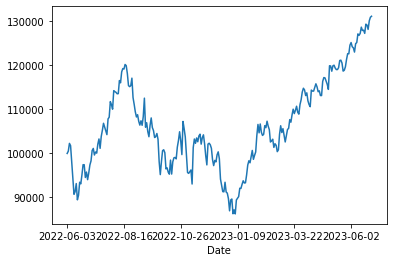

In [15]:
stock_history_norm.plot()

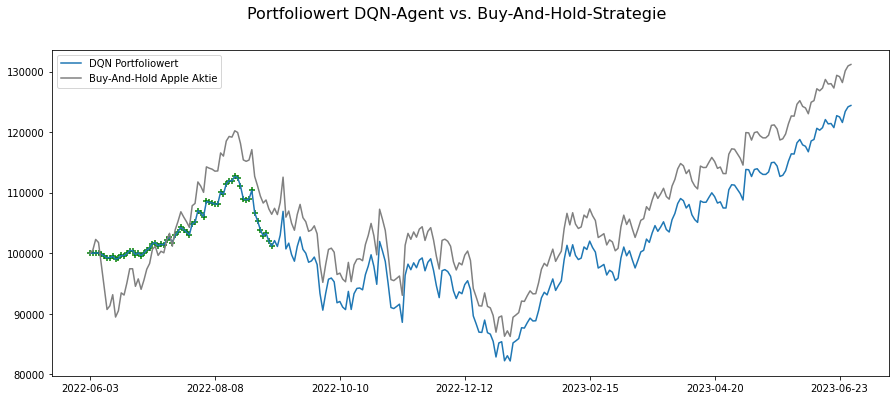

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6), sharex=True)
fig.suptitle("Portfoliowert DQN-Agent vs. Buy-And-Hold-Strategie", fontsize=16)

import matplotlib.dates as mdates

x_labels = [
    "Jul 2022",
    "Sep 2022",
    "Nov 2022",
    "Jan 2023",
    "Mar 2023",
    "Mai 2023",
]

# Plot für die erste Aktie
lines = ax.plot(value_history)
lines = ax.plot(stock_history_norm, color="gray")
lines = ax.scatter([x for x in range(len(buy_history))], value_history[:len(buy_history)], color="green", marker="+")

ax.xaxis.set_ticks([x for x in range(0, len(value_history), len(value_history)//6)])

ax.legend(["DQN Portfoliowert", "Buy-And-Hold Apple Aktie"])

In [25]:
len(buy_history)

65

## Procter & Gamble Test Evaluation

In [3]:
agent = DQN(action_space=3, epsilon=0)
agent.model.load_weights("models/pg/dqn_1")

actions = {
    0: "Hold",
    1: "Buy",
    2: "Sell"
}

value_history = []
buy_history = []
sell_history = []

def step(actions, period):
    action = np.argmax(actions)
    value_before = portfolio.get_value()

    global buy_history, sell_history

    if action == 0:
        # Hold
        pass
    if action == 1:
        # Buy
        try:
            portfolio.buy("PG", 10)
            buy_history += [period]
        except:
            pass

    if action == 2:
        # Sell
        try:
            portfolio.sell("PG", 10)
            sell_history += [period]
        except:
            pass

    portfolio.market.update_prices()

    state = portfolio.get_state()
    reward = portfolio.get_value() - value_before
    return state, reward

start_time = time.time()


# Reset environment
portfolio.reset()
portfolio.market.time_offset = 7285

total_reward = 0

for period in range(7285, 7554):
    if(period % 20 == 0):
        print(f"Periode: {period}, Total Reward: {total_reward}, {time.time()-start_time}")
    
    state = portfolio.get_state()
    value_history += [portfolio.get_value()]

    action = agent.act(state)
    next_state, reward = step(action, period)

    total_reward += reward


Periode: 7300, Total Reward: 477.8034973144531, 1.2968802452087402
Periode: 7320, Total Reward: 953.7043762207031, 2.4120850563049316
Periode: 7340, Total Reward: 1775.4869079589844, 3.462693691253662
Periode: 7360, Total Reward: -4708.907623291016, 4.55289363861084
Periode: 7380, Total Reward: -9037.949371337876, 5.616335391998291
Periode: 7400, Total Reward: 213.64852905273438, 6.682391881942749
Periode: 7420, Total Reward: 6834.548187255859, 7.767963409423828
Periode: 7440, Total Reward: 6361.125335693359, 8.835642576217651
Periode: 7460, Total Reward: -907.0448303222656, 9.906392335891724
Periode: 7480, Total Reward: 906.1167907714844, 11.002784013748169
Periode: 7500, Total Reward: 7973.863372802734, 12.090057134628296
Periode: 7520, Total Reward: 10524.075775146484, 13.175079584121704
Periode: 7540, Total Reward: 4921.773529052734, 14.274439811706543


In [37]:
print("Portfolio balance:", portfolio.balance)
print("Stocks in portfolio:", portfolio.stocks["PG"])

Portfolio balance: 59.282073974609375
Stocks in portfolio: 720


In [6]:
stock_history = loaded_stocks.iloc[7285:7554]["Adj Close"]["PG"]
stock_history

Date
2022-06-03    141.250153
2022-06-06    140.698288
2022-06-07    142.266769
2022-06-08    140.494965
2022-06-09    137.958282
                 ...    
2023-06-23    147.530472
2023-06-26    147.679520
2023-06-27    149.080688
2023-06-28    149.050888
2023-06-29    148.444702
Name: PG, Length: 269, dtype: float64

In [7]:
# Normalising each stock indendently
stock_history_norm = stock_history / 141.250153 * 100_000

In [8]:
stock_history_norm

Date
2022-06-03     99999.999708
2022-06-06     99609.299513
2022-06-07    100719.727652
2022-06-08     99465.353924
2022-06-09     97669.474716
                  ...      
2023-06-23    104446.238583
2023-06-26    104551.759072
2023-06-27    105543.735925
2023-06-28    105522.638309
2023-06-29    105093.480606
Name: PG, Length: 269, dtype: float64

In [10]:
len(buy_history)

72

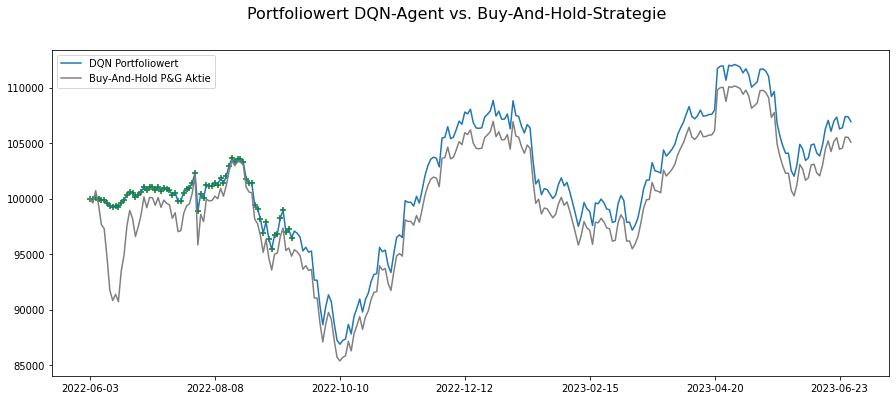

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6), sharex=True)
fig.suptitle("Portfoliowert DQN-Agent vs. Buy-And-Hold-Strategie", fontsize=16)

import matplotlib.dates as mdates

x_labels = [
    "Jul 2022",
    "Sep 2022",
    "Nov 2022",
    "Jan 2023",
    "Mar 2023",
    "Mai 2023",
]

# Plot für die erste Aktie
lines = ax.plot(value_history)
lines = ax.plot(stock_history_norm, color="gray")
lines = ax.scatter([x for x in range(len(buy_history))], value_history[:len(buy_history)], color="green", marker="+")

ax.xaxis.set_ticks([x for x in range(0, len(value_history), len(value_history)//6)])

ax.legend(["DQN Portfoliowert", "Buy-And-Hold P&G Aktie"])